# Step 4: Exploratory data analysis (Python)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# contains: taxi company name and the trips_amount for each company in november 2017
taxi_data = pd.read_csv('project_sql_result_01.csv') 

# contains: dropoff location name and the average number of rides that ended in each neighborhood
end_trip_data = pd.read_csv('project_sql_result_04.csv')

#contains: pickup date, time, weather condition and the trip duration
weather_data = pd.read_csv('project_sql_result_07.csv')





In [7]:
taxi_data.head(10) #fist look at the data


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [12]:
taxi_data.info()#cheking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [13]:
taxi_data.describe()#cheking for outliners

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [25]:
taxi_data.sort_values('trips_amount').head(10)#cheking for lower outliners

,company_name,trips_amount
63,3556 - 36214 RC Andrews Cab,2
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
61,5874 - 73628 Sergey Cab Corp.,5
60,2733 - 74600 Benny Jona,7
59,4053 - 40193 Adwar H. Nikola,7
58,5062 - 34841 Sam Mestas,8
57,Metro Group,11
56,5997 - 65283 AW Services Inc.,12
55,6057 - 24657 Richard Addo,13
54,2192 - 73487 Zeymane Corp,14


In [26]:
taxi_data.sort_values('trips_amount').tail(10)#cheking for higher outliners

,company_name,trips_amount
9,Blue Ribbon Taxi Association Inc.,5953
8,Star North Management LLC,7455
7,Sun Taxi,7701
6,City Service,8448
5,Chicago Carriage Cab Corp,9181
4,Taxi Affiliation Service Yellow,9299
3,Yellow Cab,9888
2,Medallion Leasin,10367
1,Taxi Affiliation Services,11422
0,Flash Cab,19558


In [14]:
taxi_data['company_name'].unique()#cheking the company name column for outliners

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha ride inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada',
       '6

In [18]:
taxi_data.duplicated().sum() #cheking for duplicates

0

# conclusion:
The taxi_data table has no missing values, no duplicates and the data types corresponds with the values of the data. There are some ouliners: there are companies that had only a couple drives in those 2 days of November. Also there is one company that has almost 20 thousand drives in the 2 days of the month, number that is almost twise bigger from the second biggest company in that month. This difference i to be considered when working with the data. I assume that the difference is due the company size. The companies with the few drives are probebly one man company with just one taxi driver.

In [6]:
end_trip_data.head(10) #fist look at the data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [9]:
end_trip_data.info()#cheking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [29]:
end_trip_data.describe() #cheking for outliners

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [27]:
end_trip_data.duplicated().sum()

0

# conclusion:
The end_trip_data table has no missing values, no duplicates and the data types corresponds with the values of the data. Althow there are some outliners and the standart daviation is pretty big, it is logical that there are neighborhoods that people tend to take a taxi to more then others, for example, center of the city and entertainment

# top 10 neighborhoods

In [31]:
top_10_hoods = end_trip_data.sort_values('average_trips',ascending = False).head(10)
top_10_hoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Text(0, 0.5, 'trips_amount')

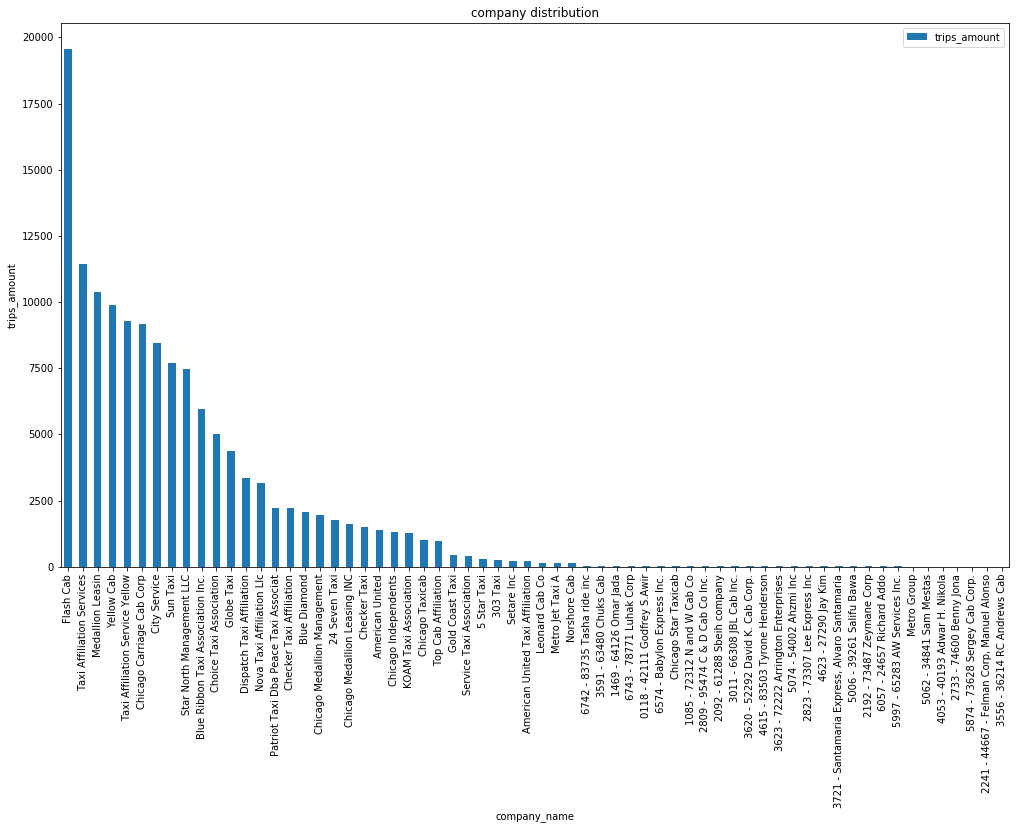

In [36]:
#ploting a bar chart
taxi_data.plot(x = 'company_name', figsize = (17, 10), kind = 'bar')
plt.title('company distribution')
plt.ylabel('trips_amount')

# coclusion:
We can see that almost half of the companies has a very few drives as appose to the thousends drives for other compenies. Also we can see in the lower side of the chart, that company nams contain numbers and often names. I assume that those are car plates and taxi driver name and they work alone or with a partner. This explains the few drives of those companies. Probebly the bigger companies has a lot more cars at their disposal. This could have been cheked if I could count the number of cars for each company. 

Text(0, 0.5, 'average_trips')

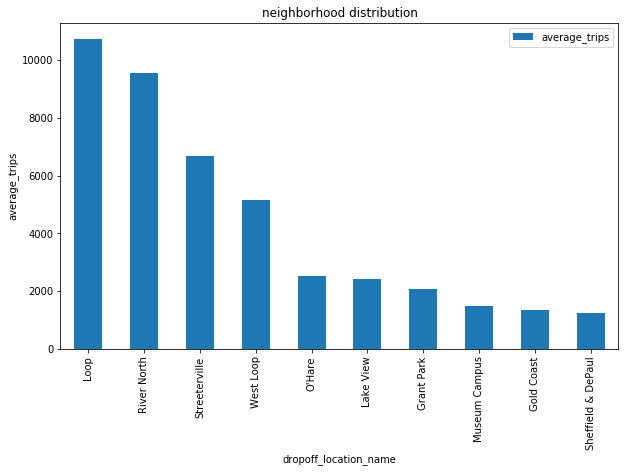

In [37]:
top_10_hoods.plot(x = 'dropoff_location_name', figsize = (10, 6), kind = 'bar')
plt.title('neighborhood distribution')
plt.ylabel('average_trips')

# Conclusion
We can see that there are 2 most popular neighborhoods('Loop' and 'River North') and 2 more that medium popular('Streeterville' and 'West Loop'), while 6 others has a couple of thousends of drives per month. 

# Step 5. Testing hypotheses (Python)

Cheking basics of the data frame:


In [38]:
weather_data.head() #first look at the data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [39]:
weather_data.info()# cheking for missing values and data types
#there no missing values' but the date data type is not date time, But isnt relevent for our hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [41]:
weather_data['weather_conditions'].unique() #cheking for unique weather condition values

array(['Good', 'Bad'], dtype=object)

H0: There no difference between the duration of rides from 'Loop' neighborhood to 'O'Hare' Airport on rainy Saturdays
H1:  There is a difference between the duration of rides from 'Loop' neighborhood to 'O'Hare' Airport on rainy Saturdays

In [50]:
#creating slices different weather
good_weather = weather_data.query('weather_conditions  == "Good"')
bad_weather = weather_data.query('weather_conditions == "Bad"')

#testing the hypothesis with t sest to independent variables
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'])
results.pvalue/2

3.2589851635497367e-12

We can not reject the null hypothesis and to support the alternative hypothesis There is a difference between the duration of rides from 'Loop' neighborhood to 'O'Hare' Airport on rainy Saturdays. The p value that was used is 0.025, becaues we dont have hypothesis about the direction of the difference.

In [59]:
#cheking the direction of the difference
weather_data.pivot_table(index = 'weather_conditions', values = 'duration_seconds', aggfunc = ['mean', 'count'])

,mean,count
,duration_seconds,duration_seconds
weather_conditions,,
Bad,2427.205556,180
Good,1999.675676,888


# conclusion:
The rides from 'Loop' neighborhood to 'O'Hare' Airport on rainy Saturdays are longer then not rainy ones. We can also see that the amount of rides at 'Bad' weather are much lower then 'Good' weather. If we could check the November month of 2017 and the proportion of good and bad weather in it we could conclude that people tend to get a taxi on good weather more then in a bad one. 
